Encontrar una serie de puntos que define nuestra función. 

In [18]:
using PyPlot
using LinearAlgebra


$$ dy/dx = x^2 -3y$$

Ecuacion diferencial

In [19]:
f(x,y) = x^2-3*y

f (generic function with 1 method)

In [20]:
a = 0
b = 1 
c = 4 # Valor hasta donde se acota x
n = 50 # Aumenta la cantidad de puntos en la gráfica
h = (c-a)/n

0.08

In [21]:
xi = []
for i = 0:n
    append!(xi, a+h*i)
end
xi


51-element Vector{Any}:
 0.0
 0.08
 0.16
 0.24
 0.32
 0.4
 0.48
 0.56
 0.64
 0.72
 0.8
 0.88
 0.96
 ⋮
 3.12
 3.2
 3.2800000000000002
 3.36
 3.44
 3.52
 3.6
 3.68
 3.7600000000000002
 3.84
 3.92
 4.0

In [22]:
yi = []
append!(yi, b) # El primer valor de y(0) = 1, es decir, b


1-element Vector{Any}:
 1

In [23]:
for i=1:n # El vector xi quedo de 6 elementos
    global k1 = h*f(xi[i], yi[i])
    global k2 = h*f(xi[i] + h/2, yi[i] + k1/2)
    global k3 = h*f(xi[i] + h/2, yi[i] + k2/2)
    global k4 = h*f(xi[i] + h, yi[i] + k3)
    append!(yi, yi[i] + 1/6*(k1 + 2*k2 + 2*k3 + k4))
end

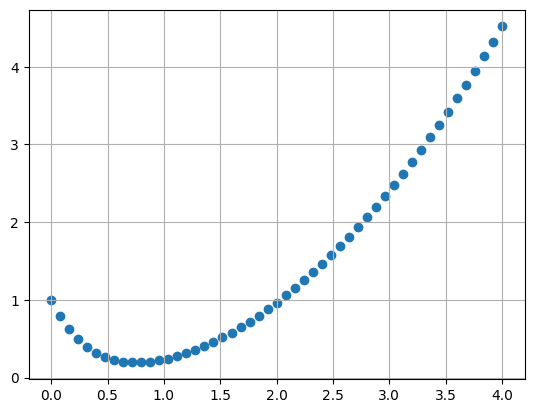

In [24]:
scatter(xi, yi)
grid("True")

In [25]:
# RungeKutta4( x1, y(0), x2, puntos, funcion(x,y) )
function RungeKutta4(a, b, c, n, fxy)
    h = (c-a)/n # Tamaño de paso
    xi = [] # Solucion de x
    yi = [] # Solucion de y
    append!(yi, b) # El primer valor de y(0) = b
    for i = 0:n
        append!(xi, a+h*i)
    end
    for i=1:n # El vector xi quedo de 6 elementos
        global k1 = h*f(xi[i], yi[i])
        global k2 = h*f(xi[i] + h/2, yi[i] + k1/2)
        global k3 = h*f(xi[i] + h/2, yi[i] + k2/2)
        global k4 = h*f(xi[i] + h, yi[i] + k3)
        append!(yi, yi[i] + 1/6*(k1 + 2*k2 + 2*k3 + k4))
    end
    scatter(xi, yi)
    grid("True")
    return xi, yi # Ajustar a una función después
end 

RungeKutta4 (generic function with 1 method)

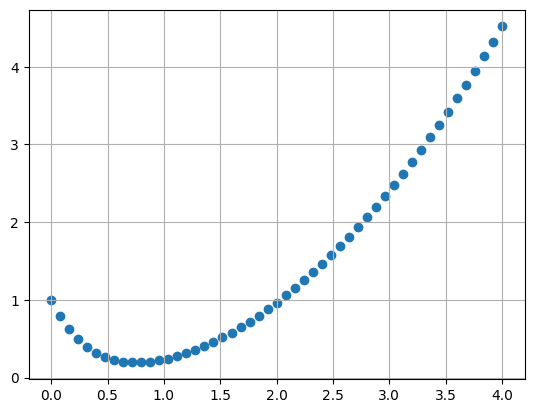

(Any[0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72  …  3.2800000000000002, 3.36, 3.44, 3.52, 3.6, 3.68, 3.7600000000000002, 3.84, 3.92, 4.0], Any[1, 0.7867952810666667, 0.6200098269121305, 0.49064971640422195, 0.3916400232285173, 0.31741536810061377, 0.26359783311681323, 0.22674359815415787, 0.20414363638752805, 0.19366693455920614  …  2.931370745175056, 3.090649105083681, 3.254196378182848, 3.422012085141284, 3.594095848900596, 3.770447372853742, 3.9510664236794666, 4.135952817839282, 4.325106410955529, 4.518527089455797])

In [26]:
xi, yi = RungeKutta4(0, 1, 4, 50, f)

Aplicando un ajuste de curva cuadratico

In [27]:
function Cramer(A, b)
    DetA = det(A)
    n = length(b)
    xi = []
    for i=1:n
        Apivot = copy(A)
        Apivot[:,i] = b
        DetApivot = det(Apivot)
        x = DetApivot/DetA
        append!(xi, x)
    end
    return xi
end

Cramer (generic function with 1 method)

In [28]:
function RegresionPolinomial(x, y)
    # x = float(x)
    # y = float(y)
    n = length(x)
    suma_x = 0
    suma_x2 = 0
    suma_y = 0
    suma_x3 = 0
    suma_xy = 0
    suma_x4 = 0
    suma_x2y = 0
    for i=1:n
        suma_x = suma_x + x[i]
        suma_x2 = suma_x2 + x[i]^2
        suma_y = suma_y + y[i]
        suma_x3 = suma_x3 + x[i]^3
        suma_xy = suma_xy + x[i]*y[i]
        suma_x4 = suma_x4 + x[i]^4
        suma_x2y = suma_x2y + y[i]*x[i]^2
    end
    
    # Resolución de matriz con regla de Cramer
    A = [n suma_x suma_x2; suma_x suma_x2 suma_x3; suma_x2 suma_x3 suma_x4]
    b = [suma_y; suma_xy; suma_x2y]
    tam_matriz = size(A)
    DetA = det(A)
    ai = Cramer(A, b)

    # Aproximacion a los resultados
    yn = []
    for i = 1:n
        append!(yn, ai[1] + ai[2]*x[i] + ai[3]*x[i]^2)
    end

    # Cálculo del coeficiente de correlacion
    media_y = suma_y/n
    suma_1 = 0
    suma_2 = 0
    for i=1:n
        suma_1 = suma_1 + (y[i] - media_y)^2
        suma_2 = suma_2 + (y[i] - ai[1] - ai[2]*x[i] - ai[3]*x[i]^2)^2
    end 
    r = (suma_1 - suma_2)/suma_1
    return ai, r, yn
end

RegresionPolinomial (generic function with 1 method)

 y = (0.604486498854807) + (-0.6881712631390741) x + (0.4236634841938795) x^2
Con un ajuste r = 0.9946


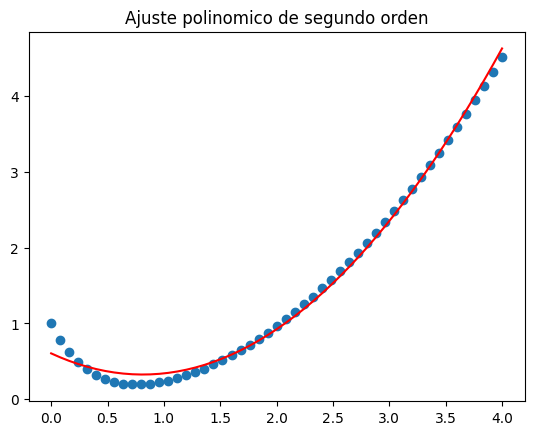

In [31]:
# Ajuste polinomico de segundo orden
ai, r, yn = RegresionPolinomial(xi, yi)
scatter(xi, yi)
plot(transpose(xi), yn, "r")
title("Ajuste polinomico de segundo orden")
println(" y = (", ai[1], ") + (", ai[2], ") x + (", ai[3], ") x^2\nCon un ajuste r = ", round(r, digits=4))
